# Unveiling Happiness: Exploring the Factors that Shape National Well-Being


### By Lydia Kim

---

# Introduction

The World Happiness Report is an annual publication that assesses the happiness and well-being of people in countries worldwide. It provides a comprehensive analysis of various factors that contribute to happiness, including economic, social, and environmental aspects. The primary aim of the World Happiness Report is to provide policymakers, governments, and individuals with valuable insights into the factors that contribute to well-being and happiness. It seeks to promote policies that prioritize happiness and sustainable development, ultimately improving the quality of life for people around the world. The report employs a combination of subjective well-being surveys and objective indicators to assess happiness levels. Subjective well-being surveys often include self-reported life satisfaction or happiness scores from individuals in each country. Objective indicators encompass economic factors like GDP per capita, social factors such as social support networks, health indicators, and more. The report combines these factors to generate happiness rankings and scores for different countries. 

---

# Data Import and Description

In this part we will import the 2023 World Happiness Report data from a CSV file and perform some basic qualitative assessments:

* examine the imported data
* check our understanding of the data format
* provide variable descriptions
* investigate the data collection procedure (sampling)

By the end of this section, we will have provided a summary of our data and have produced a version of the dataset that is ready for analysis.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import statsmodels.api as sm

# disable row limit for plotting
alt.data_transformers.disable_max_rows()

# uncomment to ensure graphics display with pdf export
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
# import raw WHR data
whr_raw = pd.read_csv('data/whr-2023.csv')
whr_raw.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


## Variable Descriptions


Column name | Meaning
---|---
`Country name` | Country name
`year` | The year that the data was recorded
`Life Ladder` | Satisfaction with life (measured on a scale from 1 to 10)
`Log GDP per capita` | The growth rate of how much each country produces, divided by the number of people in the country
`Social support` | Having someone to count on in times of trouble
`Healthy life expectancy at birth` | Healthy life expectancy at birth
`Freedom to make life choices` | Freedom to make life choices
`Generosity` | Have you donated to charity within the past month?
`Perceptions of corruption` | Do people trust in their government and have trust in the benevolence of others?
`Positive affect` | Average of previous-day affect measures for laughter, enjoyment, and interest
`Negative affect` | Average of previous-day affect measures for worry, sadness, and anger

## Sampling

The World Happiness Report utilizes a sampling methodology to gather data on happiness and well-being across different countries. The specific sampling approach may vary depending on the sources and surveys used in the report. Here are a few key points related to sampling in the World Happiness Report:

1. Survey Data: The report often relies on survey data collected from individuals within each country. These surveys may use various sampling techniques to ensure the representation of different demographic groups and regions within the country.

2. National Representative Samples: To provide an accurate representation of a country's population, surveys in the World Happiness Report generally aim to obtain national representative samples. This means that efforts are made to include individuals from various socio-economic backgrounds, age groups, geographic locations, and other relevant characteristics.

3. Survey Instruments: The World Happiness Report may incorporate data from different surveys, such as Gallup World Poll or other nationally representative surveys, which employ their own sampling methodologies. These surveys typically follow established sampling techniques to ensure the representativeness of their data.

4. Sample Size: The size of the sample used in the surveys can vary. A larger sample size generally improves the statistical reliability and precision of the findings. The World Happiness Report may provide information on the sample size used in each survey or data source.

5. Weighting: Depending on the sampling design, weighting techniques might be applied to adjust for any disparities between the sample and the target population. This ensures that the results are representative and unbiased.

In [3]:
# checking the dimensions of our dataset
rows = whr_raw.shape[0]
columns = whr_raw.shape[1]

print(rows, columns)

2199 11


We have 2199 rows and 11 columns! Let's see how many different countries we are working with.

In [4]:
whr_raw.nunique()[0]

165

It appears that our dataset encompasses a considerable number of distinct countries. To optimize efficiency in our analysis, let's reduce the number of countries while maintaining an equitable representation of the data. To facilitate this process of selection, let's start with looking at any missing values.

## Data Tidying

Now that we are familiar with our dataset, we must tidy our data so that we can move forward with our analysis. This section will consist of removing missing values, selecting which countries to work with, and creating a final, cleaned dataset.

In [5]:
# finding missing values in dataset
whr_raw.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

There seems to be a lot of missing data within the perceptions of corruption, so let's remove rows with missing data, as well as rows with data recorded before 2008. Then, we will single out countries that still have at least 15 years of data.

In [6]:
# removing rows with missing data and any data recorded before 2008
pd.options.mode.chained_assignment = None # ignore warning raised
whr_na_rm = whr_raw.dropna()
old_data_index = whr_na_rm.loc[(whr_na_rm['year'] == 2005) | (whr_na_rm['year'] == 2006) | (whr_na_rm['year'] == 2007)].index
whr_na_rm.drop(old_data_index , inplace=True)

# selecting countries with at least 15 years of data
selected_countries = whr_na_rm['Country name'].value_counts()
selected_countries = selected_countries[selected_countries > 14].index.tolist()
len(selected_countries)

41

We have 41 remaining countries that have at least 15 years of data. This amount will be much easier to work with!

In [29]:
# creating a new, cleaned data set that contains the countries in the list we made above
whr_clean = whr_na_rm[whr_na_rm['Country name'].isin(selected_countries)].reset_index().drop(columns='index')
whr_clean['Country name'].nunique() # making sure we have the same amount of countries in our data set and list

41

---

# Question of Interest

Our data set includes multiple variables that have an impact on the happiness index of each country. The happiness index, measured by the variable `Life Ladder`, will be our response variable. The rest of the variables, `Log GDP per capita`, `Social support`, `Healthy life expectancy at birth`, `Freedom to make life choices`, `Generosity`, and `Perceptions of corruption` will serve as our predictor variables. 

Thus, the aim of our project is to find which variables have the most significant impact on the overall national happiness and well-being. In order to achieve this, we will start with looking at our 41 countries, ranked by their average life ladder.

---

# Data Analysis

## Average Life Ladder Histogram

Using our cleaned data set, let's rank the 41 countries according to their average life ladder and visualize it using a histogram

In [33]:
# country rankings by life ladder
whr_ll_rank = whr_clean.groupby(['Country name']).mean(numeric_only=True).sort_values(
    by='Life Ladder', ascending=False).drop(
    columns=['year', 'Log GDP per capita', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Positive affect', 'Negative affect', 'Social support'])
whr_ll_rank.head()

,Life Ladder
Country name,
Denmark,7.639800
Sweden,7.386333
Canada,7.306800
Israel,7.300133
Costa Rica,7.054667


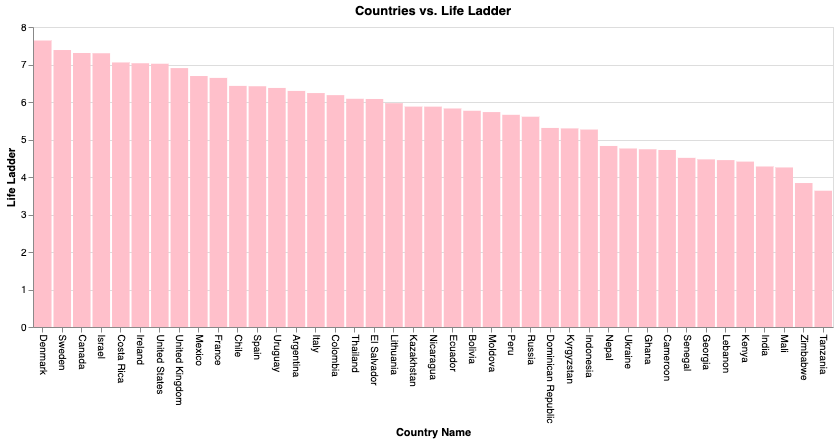

In [9]:
# create histogram
rank_hist = alt.Chart(whr_ll_rank.reset_index().sort_values(by='Life Ladder')).mark_bar(
    color='pink').encode(
    x=alt.X('Country name:N',
            title='Country Name',
            sort=list(whr_ll_rank.index.values)),
    y=alt.Y('Life Ladder',
            title='Life Ladder')
)
# set chart properties
rank_hist = rank_hist.properties(width=800, title='Countries vs. Life Ladder').configure_axisX(
    labelAngle=90
)
# display
rank_hist

## Average Life Ladder by Year

Now that we can see which countries generally have a high or low average life ladder, let's visualize the average life ladder by year to see if there are any potential outside factors affecting the average happiness level.

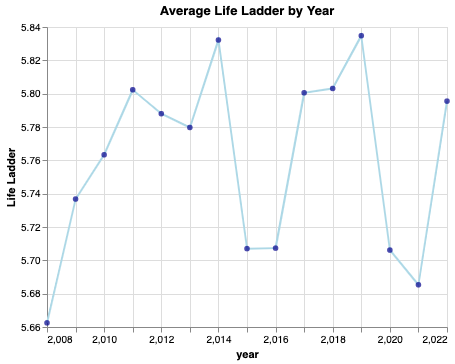

In [11]:
# group the dataframe by 'year' and calculate the average 'Life Ladder'
average_life_ladder = whr_clean.groupby('year')['Life Ladder'].mean().reset_index()

# create the line plot
line_plot = alt.Chart(average_life_ladder).mark_line(color='lightblue').encode(
    x=alt.X('year', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder', scale=alt.Scale(zero=False))
)
# adding data points
points = alt.Chart(average_life_ladder).mark_circle(color='darkblue').encode(
    x='year',
    y='Life Ladder'
)
# combine the line plot and data points
avg_ll_lineplot = line_plot + points

# plot title
avg_ll_lineplot = avg_ll_lineplot.properties(
    title='Average Life Ladder by Year'
)
# display
avg_ll_lineplot

Based on the visual representation, we observe significant fluctuations in the data between 2008 and 2022. It is important to acknowledge that besides the variables considered in our dataset, the COVID-19 pandemic likely played a significant role in the sharp decline observed specifically between 2019 and 2020. When conducting our analysis, it is crucial to take into account external factors such as this in order to gain a comprehensive understanding of the situation.

## Correlation Matrix

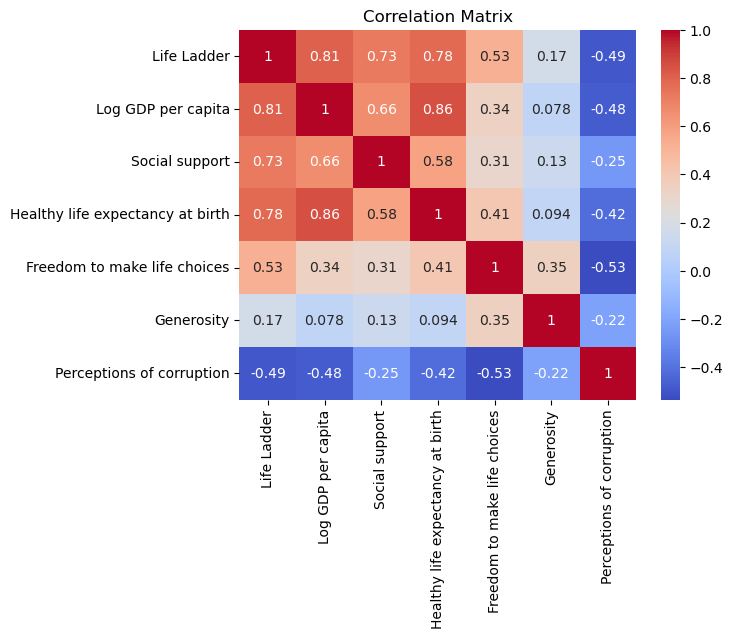

In [10]:
col = ['Life Ladder', 'Log GDP per capita', 'Social support', 
       'Healthy life expectancy at birth', 'Freedom to make life choices', 
       'Generosity', 'Perceptions of corruption']
subset_whr = whr_clean[col]
whr_corr = subset_whr.corr()
sns.heatmap(whr_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can see that the variable ‘Life Ladder’ is most strongly correlated with variables ‘Log GDP per capita’, ‘Social Support’, and ‘Healthy life expectancy at birth’ through its correlation value closest to 1. 
Interestingly, Generosity actually showed a negative correlation with Life Ladder. As satisfaction with life increases, people’s level of generosity decreases. 

## Regional Trends

To examine regional patterns and potential correlations, let's analyze the trends among countries situated in the same continent. By doing so, we can explore whether there are any associations or relationships between these countries based on their geographic proximity.

In [12]:
# creating a dictionary with countries as keys and regions as values
countries = {
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Costa Rica': 'North America',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'France': 'Europe',
    'Georgia': 'Asia',
    'Ghana': 'Africa',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Lebanon': 'Asia',
    'Lithuania': 'Europe',
    'Mali': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Nepal': 'Asia',
    'Nicaragua': 'North America',
    'Peru': 'South America',
    'Russia': 'Europe',
    'Senegal': 'Africa',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Zimbabwe': 'Africa'
}

# create new dataframe that groups countries by region
countries_by_region = pd.DataFrame({'Country name': list(countries.keys()), 'Region': list(countries.values())})

# merge cleaned dataframe with region dataframe
whr_with_region = pd.merge(whr_clean, countries_by_region, on='Country name')
whr_with_region.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Argentina,2008,5.961,10.043,0.892,66.06,0.678,-0.135,0.865,0.720,0.318,South America
1,Argentina,2009,6.424,9.972,0.919,66.18,0.637,-0.133,0.885,0.762,0.237,South America
2,Argentina,2010,6.441,10.066,0.927,66.30,0.730,-0.129,0.855,0.765,0.211,South America
3,Argentina,2011,6.776,10.112,0.889,66.42,0.816,-0.178,0.755,0.769,0.232,South America
4,Argentina,2012,6.468,10.091,0.902,66.54,0.747,-0.151,0.817,0.744,0.272,South America


In [43]:
# creating new dataframe that exhibits averages of each factor, grouped by region and year
mean_data = whr_with_region.groupby(['Region', 'year']).agg({'Life Ladder': 'mean', 
                                      'Log GDP per capita': 'mean', 
                                      'Social support': 'mean',
                                      'Healthy life expectancy at birth': 'mean'})

# display
mean_data = mean_data.reset_index()
mean_data.head()

,Region,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
0,Africa,2008,4.232714,7.810571,0.752286,50.885714
1,Africa,2009,4.140714,7.834571,0.762429,51.442857
2,Africa,2010,4.208714,7.883714,0.783429,52.000000
3,Africa,2011,4.552571,7.924857,0.779143,52.557143
4,Africa,2012,4.399000,7.956143,0.788714,53.114286


Based on our correlation matrix, we observed that Log GDP per capita, social support, and healthy life expectancy at birth exhibit the strongest correlations with the life ladder. Now, let's shift our focus to examining the average values of these variables across different regions.

## Average Life Ladder vs Average Log GDP per capita

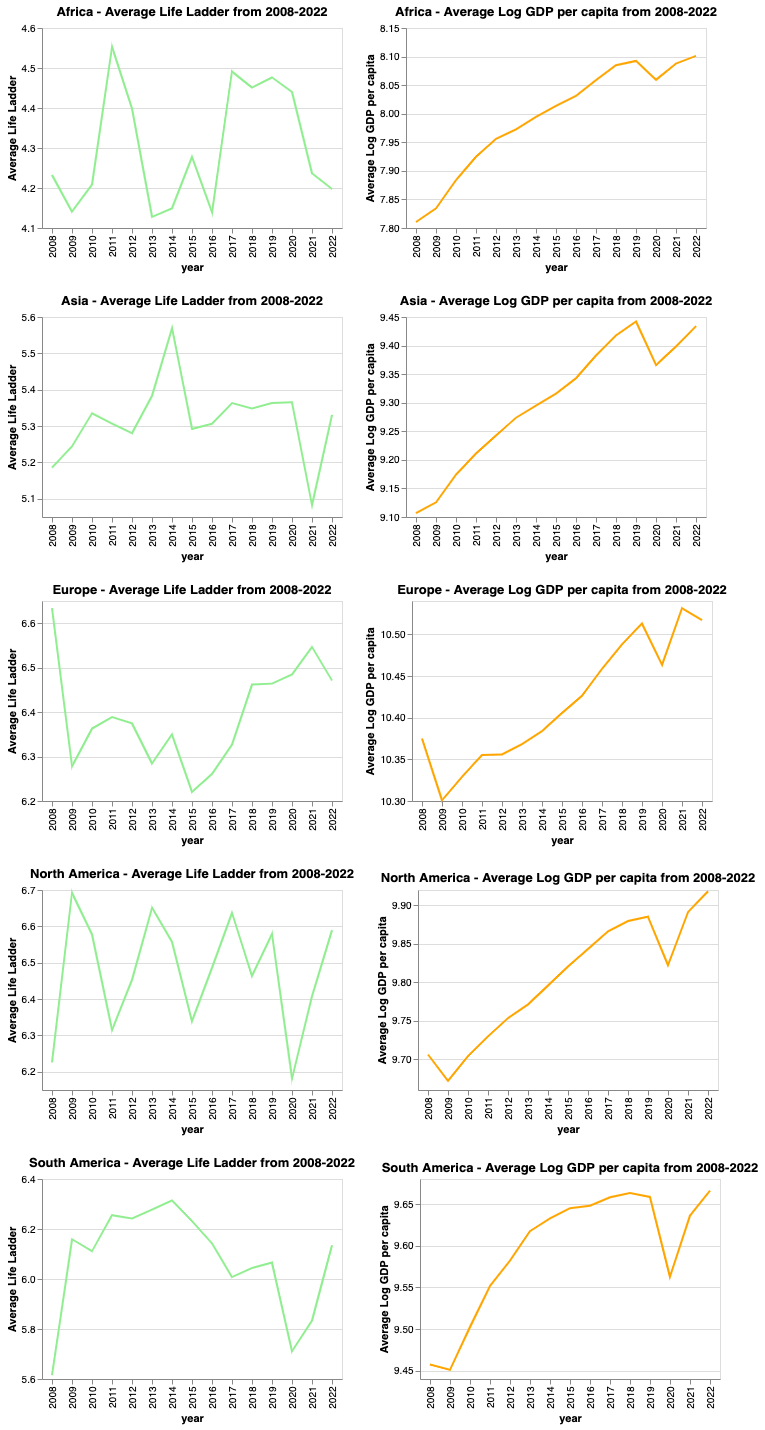

In [41]:
# group the data by region
grouped_data = mean_data.groupby('Region')

# empty list to store the concatenated charts
concatenated_charts = []

# creating subplots
for region, data in grouped_data:
    chart1 = alt.Chart(data).mark_line(color='lightgreen').transform_fold(
        fold=['Average Life Ladder', 'Average Log GDP per capita'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Life Ladder:Q', title='Average Life Ladder', scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Life Ladder from 2008-2022',
        width=300, 
        height=200
    )
    
    chart2 = alt.Chart(data).mark_line(color='orange').transform_fold(
        fold=['Average Life Ladder', 'Average Log GDP per capita'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Log GDP per capita:Q', title='Average Log GDP per capita', 
                scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Log GDP per capita from 2008-2022',
        width=300,
        height=200
    )
    
    # concatenate the charts horizontally and add to the list
    concatenated_charts.append(alt.hconcat(chart1, chart2))

# concatenate the list of charts vertically
combined_charts = alt.vconcat(*concatenated_charts)

# display the combined chart
display(combined_charts)

Upon examining the plots, a distinct trend emerges, indicating a shared decrease in log GDP per capita across all regions from 2019 to 2020. This decline can be attributed to the profound impact of the COVID-19 pandemic, which disrupted economies worldwide. The unprecedented nature of the pandemic resulted in economic contractions, job losses, and significant disruptions to global trade and commerce, ultimately affecting countries' GDP per capita. However, as we shift our focus to the years preceding 2019, a different picture emerges. Most regions do not exhibit a consistent or synchronized pattern in terms of log GDP per capita. The economic growth trajectories vary among regions due to diverse factors, such as geopolitical dynamics, regional policies, natural resources, and economic structures. These factors contribute to variations in GDP per capita growth rates, resulting in diverse patterns observed across regions. Nevertheless, it is worth noting that Europe stands out as an exception. The plots reveal a noticeable alignment between Europe's average life ladder and average log GDP per capita. This suggests a closer relationship between economic prosperity, as measured by GDP per capita, and the overall life satisfaction and well-being of individuals in European countries. The relatively high life ladder scores in Europe may be attributed, at least partially, to the region's stronger economic performance and social welfare systems, which contribute to higher living standards and social support. While the COVID-19 pandemic disrupted the global economy and led to a common decline in log GDP per capita across all regions, the variations in pre-pandemic patterns highlight the importance of considering region-specific factors when analyzing economic trends and their relationship with well-being indicators. It underscores the significance of regional context, policies, and socioeconomic factors that influence the economic trajectories and subjective well-being of populations. The plots reveal a shared decline in log GDP per capita among all regions from 2019 to 2020, primarily attributed to the impact of COVID-19. However, the lack of a consistent pattern in the years prior to 2019 emphasizes the diverse economic trajectories and regional dynamics across different regions. Europe's distinct alignment between average life ladder and average log GDP per capita highlights the closer relationship between economic prosperity and well-being in the region. Analyzing these trends provides valuable insights into the complex interplay between economic factors and individuals' overall life satisfaction and well-being across regions.

## Average Life Ladder vs Average Social support

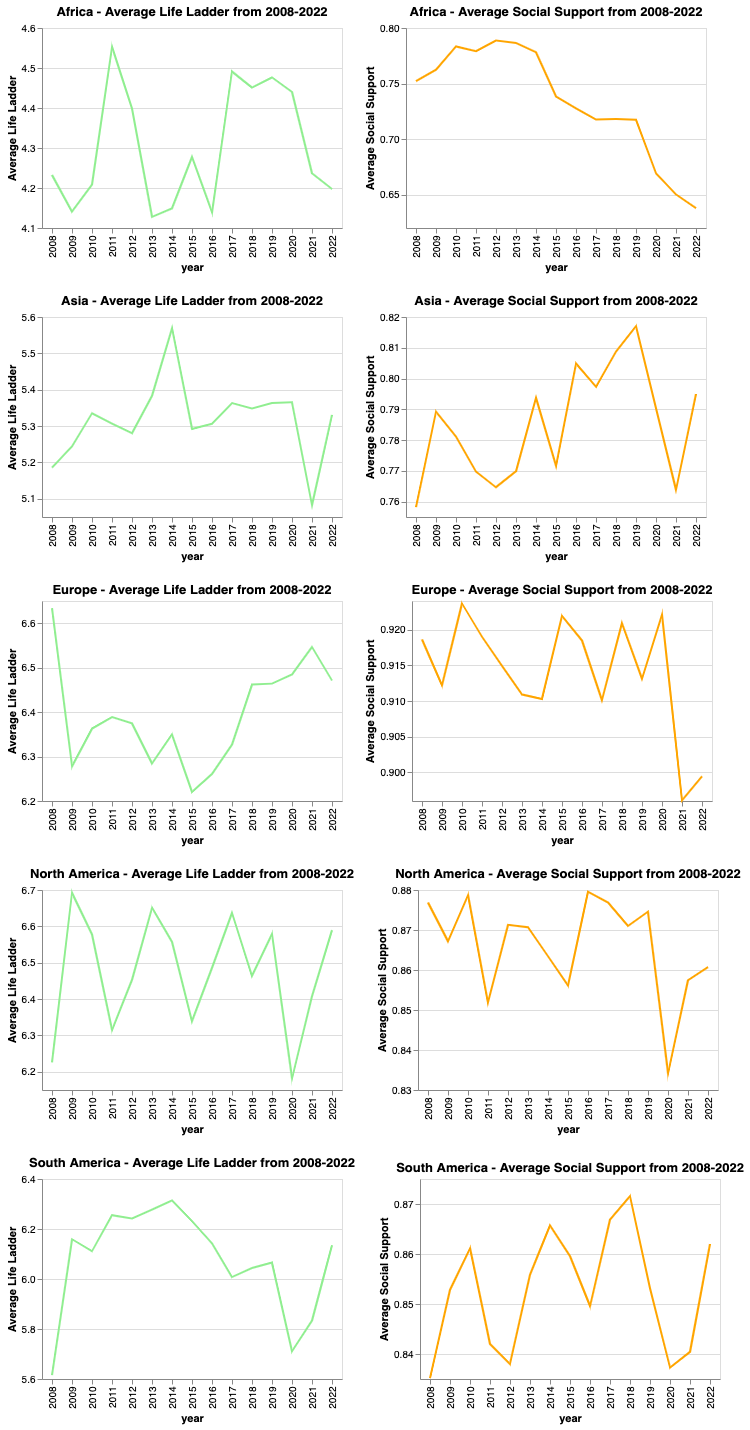

In [15]:
# empty list to store the concatenated charts
concatenated_charts = []

# creating subplots
for region, data in grouped_data:
    chart1 = alt.Chart(data).mark_line(color='lightgreen').transform_fold(
        fold=['Average Life Ladder', 'Average Social Support'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Life Ladder:Q', title='Average Life Ladder', scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Life Ladder from 2008-2022',
        width=300, 
        height=200
    )
    
    chart2 = alt.Chart(data).mark_line(color='orange').transform_fold(
        fold=['Average Life Ladder', 'Average Social Support'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Social support:Q', title='Average Social Support', 
                scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Social Support from 2008-2022',
        width=300, 
        height=200
    )
    
    # concatenate the charts horizontally and add to the list
    concatenated_charts.append(alt.hconcat(chart1, chart2))

# concatenate the list of charts vertically
combined_charts = alt.vconcat(*concatenated_charts)

# display the combined chart
display(combined_charts)


The scatter plots provide valuable insights into the relationship between the average life ladder and average social support across different regions. It is evident that each region exhibits a notable correlation between these two variables, indicating the importance of social support in overall well-being and life satisfaction. Although the variables are scaled differently in the plots, hindering a direct visual comparison, the underlying relationship remains consistent. The general pattern indicates that as social support decreases, there is a corresponding decrease in the life ladder scores. This suggests that individuals who perceive lower levels of social support may experience lower life satisfaction and well-being. The significance of social support in shaping individuals' overall happiness and life experiences cannot be understated. Social support encompasses various aspects, including emotional support, instrumental support, and a sense of belongingness within a social network or community. It plays a crucial role in providing individuals with a support system, fostering resilience, and promoting positive mental health outcomes. While the differences in scaling among the variables in the scatter plots make it challenging to precisely ascertain the similarities in the pattern, the consistent negative relationship between social support and life ladder scores emphasizes the significance of social connections and support networks in contributing to individuals' subjective well-being. The findings from these scatter plots highlight the importance of fostering social support systems and creating environments that prioritize community engagement and interpersonal relationships. Enhancing social support networks can positively impact individuals' overall life satisfaction and well-being, irrespective of the region they reside in. It is worth noting that other factors beyond social support, such as income, health, and personal circumstances, also contribute to individuals' life ladder scores. Therefore, a comprehensive understanding of well-being necessitates considering a broader range of factors and their interplay in shaping individuals' subjective assessments of their own lives. The scatter plots demonstrate a significant correlation between the average life ladder and average social support across different regions. Despite the variations in scaling, the consistent relationship underscores the role of social support in influencing individuals' subjective well-being. Promoting and enhancing social support systems can positively impact individuals' overall life satisfaction and serve as a crucial aspect of fostering well-being worldwide.

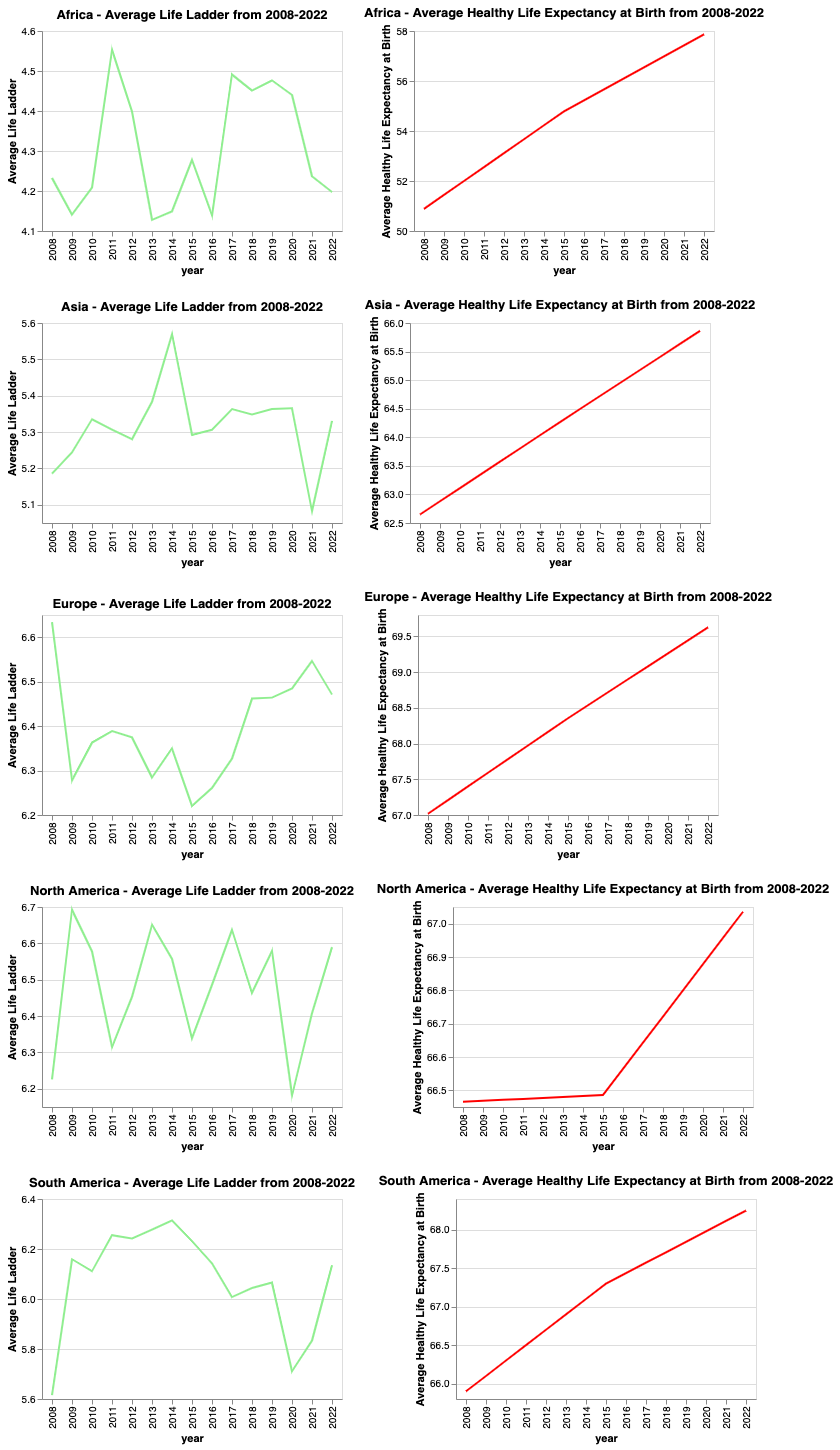

In [16]:
# empty list to store the concatenated charts
concatenated_charts = []

# creating subplots
for region, data in grouped_data:
    chart1 = alt.Chart(data).mark_line(color='lightgreen').transform_fold(
        fold=['Average Life Ladder', 'Average Healthy life expectancy at birth'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Life Ladder:Q', title='Average Life Ladder', scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Life Ladder from 2008-2022',
        width=300, 
        height=200
    )
    
    chart2 = alt.Chart(data).mark_line(color='red').transform_fold(
        fold=['Average Life Ladder', 'Average Log GDP per capita'], 
        as_=['variable', 'value']).encode(
        x='year:O',
        y=alt.Y('Healthy life expectancy at birth:Q', title='Average Healthy Life Expectancy at Birth', 
                scale=alt.Scale(zero=False))
    ).properties(
        title=f'{region} - Average Healthy Life Expectancy at Birth from 2008-2022',
        width=300,  
        height=200
    )
    
    # concatenate the charts horizontally and add to the list
    concatenated_charts.append(alt.hconcat(chart1, chart2))

# concatenate the list of charts vertically
combined_charts = alt.vconcat(*concatenated_charts)

# display the combined chart
display(combined_charts)


The analysis of the scatter plots reveals a noteworthy observation regarding the relationship between the average life ladder and average healthy life expectancy at birth. Overall, there seems to be a relatively weak correlation between these two variables. However, it is important to note that the trend in North America differs from the other regions. Across most regions, including Europe, Asia, South America, and Africa, there is a consistent linear increase in life expectancy from 2008 to 2022. This implies that over the years, these regions have experienced improvements in health conditions and an overall increase in life expectancy at birth. These positive trends suggest the presence of various factors, such as advancements in healthcare, better access to medical facilities, and improved living standards, contributing to longer life expectancies. However, it is worth mentioning that North America stands out from the other regions in terms of this trend. The scatter plot shows a deviation from the linear increase in life expectancy, indicating a unique pattern within the region. Further exploration and analysis would be required to understand the specific factors driving this difference in North America, as it may be influenced by various socio-economic, cultural, or healthcare-related factors specific to the region. While the correlation between average life ladder and average healthy life expectancy at birth appears weak, it is important to consider that life expectancy is just one aspect contributing to overall well-being and life satisfaction. Other factors, such as social support, income, and personal experiences, also play significant roles in determining individuals' life ladder scores. Therefore, a comprehensive understanding of well-being requires examining multiple dimensions and considering a holistic approach. The observed trends suggest a consistent increase in life expectancy across most regions from 2008 to 2022, indicating positive developments in health conditions. However, the relationship between life ladder scores and healthy life expectancy at birth shows variations among regions, highlighting the need for further investigation into the unique factors shaping these trends, particularly in North America.

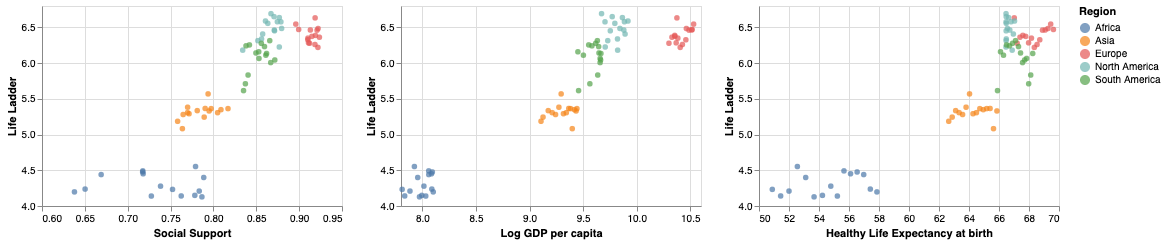

In [27]:
# plots showing relationship between variables, grouped by region (ignoring year)

# Social support
scatter_social = alt.Chart(mean_data).mark_circle().encode(
    x=alt.X('Social support:Q', title='Social Support', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder:Q', title='Life Ladder', scale=alt.Scale(zero=False)),
    color='Region:N'
).properties(
    width=300,
    height=200
)

# Log GDP per capita
scatter_gdp = alt.Chart(mean_data).mark_circle().encode(
    x=alt.X('Log GDP per capita:Q', title='Log GDP per capita', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder:Q', title='Life Ladder', scale=alt.Scale(zero=False)),
    color='Region:N'
).properties(
    width=300,
    height=200
)

# Healthy life expectancy at birth
scatter_life_expectancy = alt.Chart(mean_data).mark_circle().encode(
    x=alt.X('Healthy life expectancy at birth:Q', title='Healthy Life Expectancy at birth', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder:Q', title='Life Ladder', scale=alt.Scale(zero=False)),
    color='Region:N'
).properties(
    width=300,
    height=200
)

# combine plots horizontally
combined_plot = alt.hconcat(scatter_social, scatter_gdp, scatter_life_expectancy).resolve_scale(y='independent')

# display
display(combined_plot)


Analyzing the scatter plots presented above reveals a recurring pattern among the regions, indicating a distinct order in terms of life ladder scores and the factors examined. The plots demonstrate a consistent linear relationship between the life ladder and each factor, suggesting a correlation between these variables. Notably, Africa consistently exhibits the lowest values in each chart, followed by Asia, South America, North America, and finally Europe. These regional disparities indicate clear variations in the average life ladder scores across different parts of the world. The observed pattern suggests that regions with lower life ladder scores, such as Africa and Asia, may face common challenges that affect individuals' well-being and life satisfaction. These challenges might include socioeconomic inequalities, limited access to essential services, and potential political or social instabilities. In contrast, regions like Europe and North America tend to display higher life ladder scores, implying better overall life satisfaction and well-being. These regions may benefit from factors such as stronger economies, robust social support systems, and favorable living conditions, which contribute to higher life ladder rankings. The distinct regional differences highlighted by the scatter plots underscore the importance of considering geographical context and regional dynamics when examining well-being and quality of life. It emphasizes the need for targeted interventions and policies to address the specific challenges faced by regions with lower life ladder scores and promote equitable development and improved well-being globally.

## Multiple Regression

In [30]:
# multiple regression analysis 
x_var = whr_clean.loc[:, ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
x = sm.tools.add_constant(x_var)
y = whr_clean['Life Ladder']

mlr = sm.OLS(endog=y, exog=x)
rslt = mlr.fit() 

# retreive estimates and std errors
coef_tbl = pd.DataFrame({
    'estimate': rslt.params,
    'standard error': np.sqrt(rslt.cov_params().values.diagonal()) 
    },
    index = x.columns.values 
)
coef_tbl.loc['error variance', 'estimate'] = rslt.scale

# display
coef_tbl

,estimate,standard error
const,-4.352858,0.349748
Log GDP per capita,0.332916,0.045630
Social support,3.536256,0.280224
Healthy life expectancy at birth,0.043730,0.007125
Freedom to make life choices,1.904703,0.235114
Generosity,0.008543,0.128688
Perceptions of corruption,-0.415452,0.145564
error variance,0.263847,NaN


Our multiple regression estimate and standard error show positive slopes among Log GDP per capita, Social support, and Freedom to make life choices. 
The coefficient for Healthy life expectancy at birth is very close to zero, and the coefficient of Generosity includes 0 with standard error, which indicates that there may not be a relationship between Life Ladder and these two variables. Perceptions of corruption has a negative slope– in parallel with its negative relationship with Life Ladder. 
Since each variable is measured on a different scale, we will take those variables with positive estimate value from multiple regression and look into its individual variable’s relationship with Life Ladder. In order to achieve this, we will plot each variable through simple regression. 

## Simple Regression

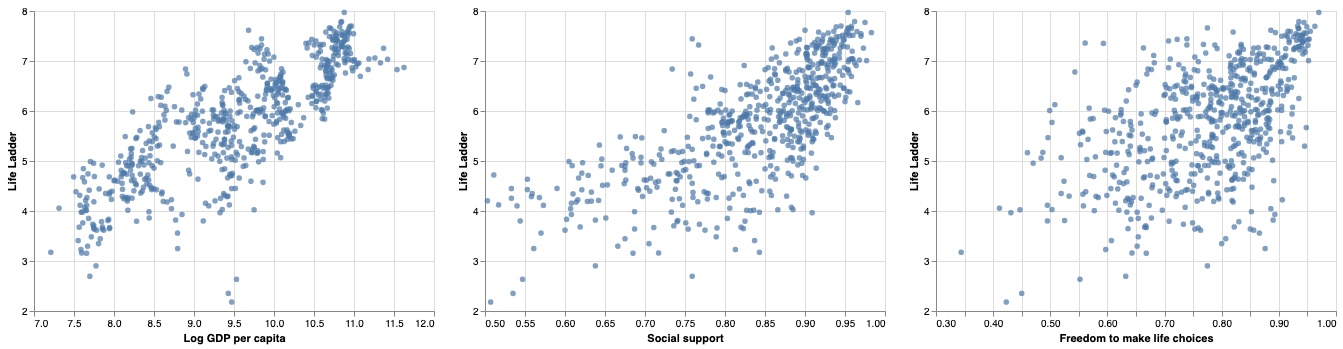

In [32]:
# simple regression 
chart1 = alt.Chart(whr_clean).mark_circle().encode(
    x=alt.X('Log GDP per capita', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder', scale=alt.Scale(zero=False), title='Life Ladder')
)

chart2 = alt.Chart(whr_clean).mark_circle().encode(
    x=alt.X('Social support', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder', scale=alt.Scale(zero=False), title='Life Ladder')
)

chart3 = alt.Chart(whr_clean).mark_circle().encode(
    x=alt.X('Freedom to make life choices', scale=alt.Scale(zero=False)),
    y=alt.Y('Life Ladder', scale=alt.Scale(zero=False), title='Life Ladder')
)

combined_chart = alt.hconcat(chart1, chart2, chart3)

# display the combined chart
display(combined_chart)

The simple linear regression graphs show a more clear representation of each variable’s relationship with life ladder. Log GDP per capita shows the most linear relationship, where the points are least scattered and spread out on its positively sloping pattern. On the other hand, the points for freedom to make life choices are very much scattered throughout the entire plot and it is hard to see a clear pattern or relationship between life ladder. 

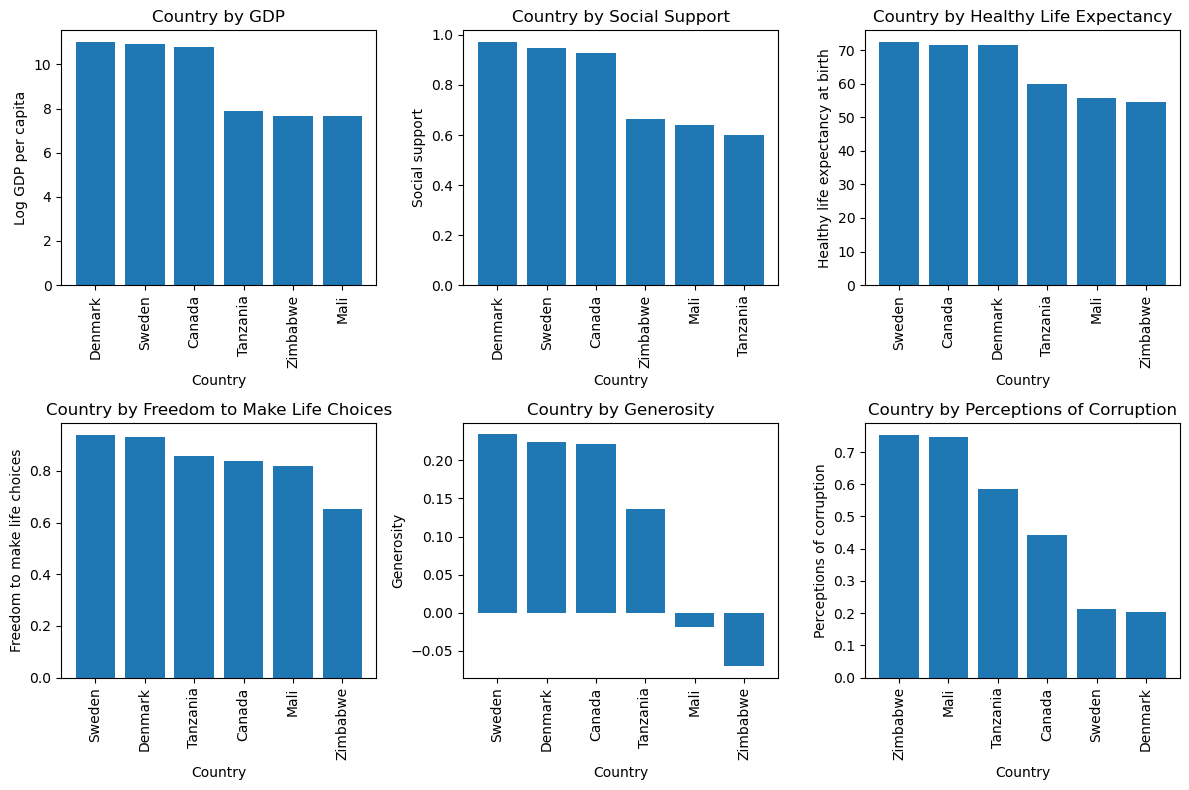

In [20]:
# variable list and corresponding titles
variables = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
titles = ['Country by GDP', 'Country by Social Support', 'Country by Healthy Life Expectancy', 'Country by Freedom to Make Life Choices', 'Country by Generosity', 'Country by Perceptions of Corruption']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# creating subplots
for i, (variable, title) in enumerate(zip(variables, titles)):
    row = i // 3
    col = i % 3

    whr_2 = whr_clean[whr_clean['year'] == 2022]
    countries = ['Denmark', 'Sweden', 'Canada', 'Mali', 'Zimbabwe', 'Tanzania']
    whr_filter = whr_2[whr_2['Country name'].isin(countries)]
    whr_sort = whr_filter.sort_values(variable, ascending=False)

    country = whr_sort['Country name']
    value = whr_sort[variable]

    axes[row, col].bar(country, value)
    axes[row, col].set_xlabel('Country')
    axes[row, col].set_ylabel(variable)
    axes[row, col].set_title(title)
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()

# display
plt.show()


To look deeper into these factors, we picked the top 3 countries with the highest overall Life Ladder, as well as the 3 countries with lowest and plotted it against each variable in measure. Countries with the highest Life Ladder are Denmark, Sweden, and Canada, and lowest are Tanzania, Zimbabwe, and Mali. 
Most noticeably, GDP and Social support graphs show a distinct difference between the countries, where the high Life ladder countries have a higher GDP per capita and social support compared to the low life ladder countries. Healthy life expectancy also showed this pattern, but the difference between countries isn’t as drastic. The three countries with the highest life ladder showed a much higher level of generosity, whereas the lowest countries had low, or even negative levels of generosity. 
However, the freedom to make life choices showed unexpected results. One of the countries with the lowest life ladder, Tanzania, had a higher level of freedom to make life choices than Canada, the country with the third highest life ladder. Tanzania, Canada, and Mali all have very similar levels of freedom to make life choices. 
These graphs revealed that the freedom to make life choices may not have a significant impact on life ladder, and GDP per capita and social support are consistently showing their strong correlating relationship with Life Ladder. 

---

# Summary of Findings

The analysis of the data reveals several key findings. From the correlation matrix, it is evident that the variable 'Life Ladder' is most strongly correlated with 'Log GDP per capita,' 'Social Support,' and 'Healthy life expectancy at birth.' However, it is interesting to note that 'Generosity' shows a negative correlation with 'Life Ladder,' indicating that as satisfaction with life increases, people tend to be less generous.
Firstly, external factors such as the pandemic need to be considered when analyzing the data to gain a comprehensive understanding of the situation. Examining the plots, a distinct trend emerges, showing a shared decrease in log GDP per capita across all regions from 2019 to 2020, primarily due to the impact of the COVID-19 pandemic. However, in the years preceding 2019, there is no consistent or synchronized pattern in log GDP per capita among regions. Europe stands out as an exception, with a noticeable alignment between average life ladder and average log GDP per capita. 
The scatter plots demonstrate the significance of social support in overall well-being and life satisfaction. As social support decreases, there is a corresponding decrease in life ladder scores, indicating that individuals who perceive lower levels of social support may experience lower life satisfaction and well-being. There is a relatively weak correlation between life ladder scores and healthy life expectancy at birth. While most regions show a consistent linear increase in life expectancy over the years, North America deviates from this trend, indicating unique factors at play in the region. 
Multiple regression estimates show positive slopes for variables such as Log GDP per capita, Social Support, and Freedom to make life choices, indicating a positive relationship with life ladder scores. However, variables like Healthy life expectancy at birth and Generosity do not show a significant relationship. Simple regression graphs provide a clearer representation of each variable's relationship with life ladder, with Log GDP per capita showing the most linear relationship and freedom to make life choices showing a scattered pattern.
Further analysis comparing countries with the highest and lowest life ladder scores reveals that countries with higher life ladder scores tend to have higher GDP per capita, social support, and healthy life expectancy. However, the freedom to make life choices does not show a significant impact on life ladder scores.

# Conclusion

In conclusion, the analysis highlights the importance of economic prosperity and social support systems in understanding well-being and life satisfaction. To answer the question, which variables have the most significant impact on the overall national happiness and well being, economic factors, such as GDP per capita and social support, play the most significant roles based on all of our plots and analysis. Enhancing social support networks can positively impact individuals' overall life satisfaction and well-being globally, and there is a strong relationship between economic prosperity, as measured by GDP per capita, and the overall life satisfaction and well-being of individuals. 